# Laboratorium 1 - MOwNiT2

## Arytmetyka komputerowa

In [6]:
using Plots

<b> Zadanie 1 </b>  Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float32, Float64 oraz liczby, 
która jest inicjalizowana jako Float32, a potem rzutowana na Float64.

In [1]:
bitstring(Float32(1.0/3.0))

"00111110101010101010101010101011"

In [2]:
bitstring(Float64(1.0/3.0))

"0011111111010101010101010101010101010101010101010101010101010101"

In [3]:
bitstring(Float64(Float32(1.0/3.0)))

"0011111111010101010101010101010101100000000000000000000000000000"

<b>Zadanie 2</b> Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000.0 z krokiem 1.0.

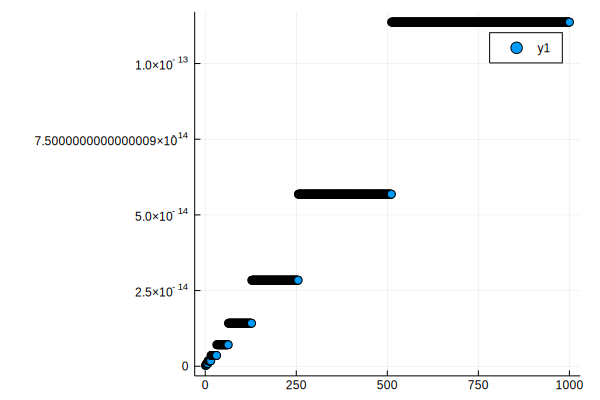

In [7]:
n = Float32[]
for i = 1.0 : 1000.0
    push!(n, nextfloat(i) - i)
end

scatter(1:1:1000, n)

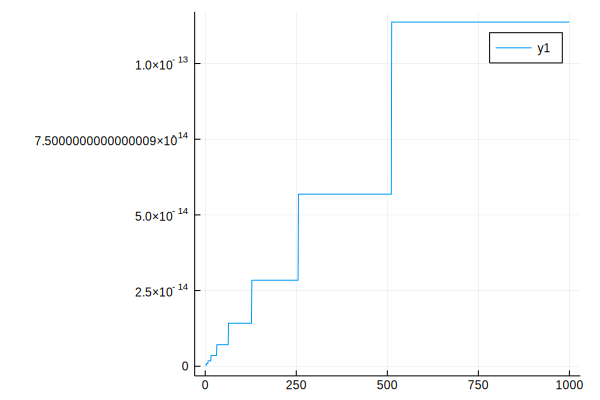

In [9]:
n = Float64[]
for i = 1.0 : 1000.0
    push!(n, eps(Float64(i)))
end

plot(1:1000, n)

<b>Zadanie 3</b> Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

In [ ]:
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>


int main()
{
    float f = 1.0;
    for (int i = 0; i < 160; i++) {
        prinf("f = ")
        gsl_ieee_printf_float(&f);
        printf("\n");
        f /= 2.0;
    }
    return 0;
}

<b>Zadanie 4</b> Wymyślić własny przykład algorytmu niestablinego numerycznie. 
1. Zademostrować wersję niestabilną, pokazać, że działa źle.
2. Wyjaśnić, dlaczego działa źle.
3. Zademonstować wersję stabilną.
4. Język dowolny.

Błąd związany z reprezentacją liczbową.

In [12]:
i = 0.0
while(i < 2.0)
    println(i)
    i += 0.1
end

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.2
1.3
1.4000000000000001
1.5000000000000002
1.6000000000000003
1.7000000000000004
1.8000000000000005
1.9000000000000006


Rozwiązywanie równania kwadratowego bez i z użyciem wzorów Viete'a.

In [42]:
function solve_quadratic_equation(a,b,c)
    delta = b * b - 4 * a * c
    sqrt_d = sqrt(delta)
    x1 = (-b - sqrt_d) / (2 * a)
    x2 = (-b + sqrt_d) / (2 * a)
    return x1, x2
end

solve_quadratic_equation(2, -61.4234333, 0.02140943274)

(0.0003485587596809836, 30.711368091240317)

In [43]:
function solve_quadratic_equation_with_viete(a,b,c)
    delta = b * b - 4 * a * c
    sqrt_d = sqrt(delta)
    if b < 0
        x1 = (- b - sqrt_d) / (2 * a)
        x2 = (c / a) / x1
    else
        x2 = (b - sqrt_d) / (2 * a)
        x1 = (c / a) / x2
    end
    return x1, x2
end

solve_quadratic_equation_with_viete(2, -61.4234333, 0.02140943274)

(0.0003485587596809836, 30.711368091272274)

Mnożenie bez i z wykorzystaniem wzoru skróconego mnożenia (w tym przypadku akurat działa, ale jest to wersja niestabilna). 

In [48]:
function count_without_smf(a,b)
    (a + b) * (a - b)
end

count_without_smf(-61.425434634333, 0.0090012140943274)

3773.083938994861

In [49]:
function count_with_smf(a,b)
    (a * a) - (b * b)
end

count_with_smf(-61.425434634333, 0.0090012140943274)

3773.083938994861